In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd
import openpyxl


### 데이터 크롤링 

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument("disable-gpu")
options.add_argument(
    "user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36")  # 네트워크 설정
options.add_argument("lang=ko_KR")
driver = webdriver.Chrome("/Users/park/Desktop/Assignment/IT집중교육/project/chromedriver")

data_list = []
max_iter = 20
url_list = []
title_list = []
# url = "https://www.youtube.com/c/UPKTV/videos"
# url = "https://www.youtube.com/"
url = 'https://www.youtube.com/c/MBCNEWS11/videos'
url1 = 'https://www.youtube.com/sbs8news/videos'
url2 = 'https://www.youtube.com/c/newskbs/videos'


In [ ]:
def scroll_down(url_str):
    driver.get(url_str)
    last_page_height = driver.execute_script(
        "return document.documentElement.scrollHeight")
    i = 0
    while i < max_iter:
        driver.execute_script(
            "window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(3)
        i += 1
        new_page_height = driver.execute_script(
            "return document.documentElement.scrollHeight")
        if new_page_height == last_page_height:
            break


In [ ]:
def find_url(url_str):
		scroll_down(url_str)
		html0 = driver.page_source
		html = BeautifulSoup(html0, 'html.parser')
		video_url_list = html.findAll('a', {'id': 'video-title'})
		# video_url_list = html.findAll('a', {'id': 'video-title-link'})
		for a in video_url_list:
				title_list.append(a.text)
				# if a.get('href') is not None:
				# 		url_list.append('https://www.youtube.com' + a.get('href'))
find_url(url)
find_url(url1)
find_url(url2)


In [ ]:
rst = pd.DataFrame(title_list, columns=['title'])
rst.to_excel(f'/Users/park/Desktop/Assignment/IT집중교육/project/title_data_random_3.xlsx', index=False)


In [ ]:
def main():
    find_url()
    print("Total Length = " + " ", len(url_list))
    for idx in range(len(url_list)):
        print("iter = ", idx + 1)
        driver.get(url_list[idx])
        last_page_height = driver.execute_script(
            "return document.documentElement.scrollHeight")
        i = 0
        while i < max_iter:
            driver.execute_script(
                "window.scrollTo(0, document.documentElement.scrollHeight);")
            time.sleep(2)
            i += 1
            new_page_height = driver.execute_script(
                "return document.documentElement.scrollHeight")
            if new_page_height == last_page_height:
                break

        html0 = driver.page_source
        html = BeautifulSoup(html0, 'html.parser')
        comments_list = html.findAll(
            'ytd-comment-thread-renderer', {'class': 'style-scope ytd-item-section-renderer'})

        for j in range(len(comments_list)):
            comment = comments_list[j].find(
                'yt-formatted-string', {'id': 'content-text'}).text
            comment = comment.replace('\n', '')  # 줄 바뀜 없애기
            comment = comment.replace('\t', '')  # 탭 줄이기

            data = {'comment': comment}
            data_list.append(data)

        result_df = pd.DataFrame(data_list, columns=['comment'])
        result_df.to_excel(
            f'/Users/park/Desktop/Assignment/IT집중교육/project/comment_news_data_random.xlsx', index=False)
    driver.close()


In [ ]:
main()

### 데이터 전처리

In [1]:
import re
import pandas as pd

k = 0
# df = pd.read_excel('comment_data.xlsx')
df = pd.read_excel('comment_news_data_random.xlsx')
title_df = pd.read_excel('title_data_random_3.xlsx')
data = df['comment']
title_data = title_df['title']

In [2]:
data

0       검사를 상대할수 있는건 특검 밖에 없다.  경찰의 수사권은 경찰이 뵹신이라 지키지 ...
1       정말로 검찰도 견제해야할 기관이 필요하다 그리고 잘못내린결정에. 끝까지 책임추궁할 ...
2       대통령이  사과를 안하면 국힘이라도 좀 겸손히 사과할 것은 사과를 해야지 어찌그리 ...
3       민주당안에서 대장동 발언했던 사람이 누구인가?내각제를 생각하는 정치인들은 누구인가?...
4       윤씨권력예산높이고  국민예산  낯추는것은  윤씨권력의  철권통치권력의  기반이된다 ...
                              ...                        
7491                                대장동  50억  클럽  수사는  잠잠
7492        추우면 미세먼지 없고 따뜻하면 미세먼지 잔뜩이었던 것을 한동안 잊고 살았네요...
7493                              귀여운금채림 퇴근길날씨정보감사합니다~~^^
7494                                    내일 에버랜드 가는데 감사해요!
7495    고생하셨습니다 감사합니다 예쁜채림공주님최고입니다 예뻐요 힘내세요 파이팅하세요 꽃보다예뻐요
Name: comment, Length: 7496, dtype: object

In [3]:
title_data

0        [뜨거운 세계] 1회 "직업이 주석" 3연임 절대반지 낀 시진핑 (2022.10.23)
1       민주 "특검 수용하라, 대통령 시정 연설 묵과 못해" - [LIVE] MBC 뉴스데...
2       [날씨] '북서쪽 찬공기 영향' 내일 출근길 파주 2도·서울 6도 (2022.10....
3       [스포츠 영상] 울산 현대, 17년 걸린 우승 세리머니 (2022.10.23/뉴스데...
4       '뒤집기 득점왕' 조규성‥'첫 승강 PO행' 안양 (2022.10.23/뉴스데스크/...
                              ...                        
1735     신규 확진, 전주 대비 2배 증가…7차 유행 빨라지나 / KBS  2022.10.18.
1736                      이 시각 소방청 상황실 / KBS  2022.10.18.
1737    [단독] “같은 얼굴, 같은 수법에 당했다”…김근식 또 다른 ‘암수범죄’ / KBS...
1738    공정위, 플랫폼 독과점 손본다…“시장지배적 지위 남용” / KBS  2022.10.18.
1739    마라도 해상 어선 전복, 야간 수색 중…선원 4명 실종 / KBS  2022.10.18.
Name: title, Length: 1740, dtype: object

In [4]:
# 한글자로 되어있는 단어 & 모음 (ㅋㅋㅋ, ㅎㅎㅎ, 와, 는, 꼭, 가, 더, 은 등등) 및 한글이 아닌 단어들(이모티콘, 숫자, 영어)은 정규표현식을 이용해 제거
new_data = []
new_title_data = []
for i in data:
		text = re.compile('[가-힣]+').findall(str(i))
		tmp = []
		if len(text) <= 1:
			pass
		for tok in text:
			if len(tok) <= 1:
				continue
			tmp.append(tok)
		new_data.append(' '.join(tmp))

for i in title_data:
	text = re.compile('[가-힣]+').findall(str(i))
	tmp = []
	if len(text) <= 1:
			pass
	for tok in text:
		if len(tok) <= 1:
			continue
		tmp.append(tok)
	new_title_data.append(' '.join(tmp))


In [5]:
# 비어있는 row 제거
print(len(new_data))
drop_index = []
for i in range(len(new_data)):
	if new_data[i] == '':
		drop_index.append(i)
new_data = pd.DataFrame(new_data)
new_data = new_data.drop(drop_index)
print(len(new_data))

print(len(new_title_data))
drop_index = []
for i in range(len(new_title_data)):
	if new_title_data[i] == '':
		drop_index.append(i)
new_title_data = pd.DataFrame(new_title_data)
new_title_data = new_title_data.drop(drop_index)
print(len(new_title_data))


7496
7459
1740
1740


In [6]:
new_data


,0
0,검사를 상대할수 있는건 특검 밖에 없다 경찰의 수사권은 경찰이 뵹신이라 지키지 못하...
1,정말로 검찰도 견제해야할 기관이 필요하다 그리고 잘못내린결정에 끝까지 책임추궁할 법...
2,대통령이 사과를 안하면 국힘이라도 겸손히 사과할 것은 사과를 해야지 어찌그리 대통령...
3,민주당안에서 대장동 발언했던 사람이 누구인가 내각제를 생각하는 정치인들은 누구인가 ...
4,윤씨권력예산높이고 국민예산 낯추는것은 윤씨권력의 철권통치권력의 기반이된다 윤씨권력예...
...,...
7491,대장동 클럽 수사는 잠잠
7492,추우면 미세먼지 없고 따뜻하면 미세먼지 잔뜩이었던 것을 한동안 잊고 살았네요
7493,귀여운금채림 퇴근길날씨정보감사합니다
7494,내일 에버랜드 가는데 감사해요


In [7]:
new_title_data

,0
0,뜨거운 세계 직업이 주석 연임 절대반지 시진핑
1,민주 특검 수용하라 대통령 시정 연설 묵과 못해 뉴스데스크 뜨거운 세계
2,날씨 북서쪽 찬공기 영향 내일 출근길 파주 서울 뉴스데스크
3,스포츠 영상 울산 현대 걸린 우승 세리머니 뉴스데스크
4,뒤집기 득점왕 조규성 승강 안양 뉴스데스크
...,...
1735,신규 확진 전주 대비 증가 유행 빨라지나
1736,시각 소방청 상황실
1737,단독 같은 얼굴 같은 수법에 당했다 김근식 다른 암수범죄
1738,공정위 플랫폼 독과점 손본다 시장지배적 지위 남용


In [8]:
# from konlpy.tag import Kkma
# kkma = Kkma()

# def get_noun(row):
# 	nouns = kkma.nouns(row)
# 	return nouns


# new_data[0] = new_data[0].apply(lambda x: get_noun(x))

#kkma 보다 okt가 훨씬 빠름
from konlpy.tag import Okt
okt = Okt()

trash_nouns = ['뉴스', '뉴스데스크', '뉴스투데이']

def get_noun(row):
	nouns = okt.nouns(row)
	for n in trash_nouns:
		try:
			nouns.remove(n)
		except:
			pass
	return nouns

new_data[0] = new_data[0].apply(lambda x: get_noun(x))
new_title_data[0] = new_title_data[0].apply(lambda x: get_noun(x))


[0.005s][warning][os,thread] Attempt to protect stack guard pages failed (0x000000016cf58000-0x000000016cf64000).
[0.005s][warning][os,thread] Attempt to deallocate stack guard pages failed.


In [9]:
new_data[0]

0       [검사, 상대, 특검, 경찰, 수사권, 경찰, 뵹신, 못, 수사권, 가지, 수사, ...
1                     [검찰, 견제, 기관, 결정, 끝, 책임, 추궁, 법안, 생각]
2       [대통령, 사과, 국힘, 사과, 것, 사과, 어찌, 대통령, 대통령, 아예, 사람인...
3       [민주당, 안, 대장동, 발언, 사람, 누구, 내각제, 생각, 정치인, 누구, 국짐...
4       [윤씨, 권력, 예산, 높이, 국민, 예산, 낯, 윤씨, 권력, 철권, 통치권, 기...
                              ...                        
7491                                        [대장동, 클럽, 수사]
7492                                  [미세먼지, 미세먼지, 잔뜩, 것]
7493                                 [금, 채림, 퇴근길, 날씨, 정보]
7494                                           [내일, 에버랜드]
7495                             [고생, 채림, 공주, 최고, 파이팅, 꽃]
Name: 0, Length: 7459, dtype: object

In [10]:
new_title_data[0]

0                  [세계, 직업, 주석, 임, 절대반지, 시진핑]
1            [민주, 특검, 수용, 대통령, 시정, 연설, 묵, 세계]
2       [날씨, 북서쪽, 찬, 공기, 영향, 내일, 출근길, 파주, 서울]
3                 [스포츠, 영상, 울산, 현대, 우승, 세리머니]
4                             [득점, 규, 승강, 안양]
                        ...                  
1735             [신규, 확진, 전주, 대비, 증가, 유행, 지나]
1736                         [시각, 소방청, 상황, 실]
1737              [단독, 얼굴, 수법, 김근식, 다른, 암수범죄]
1738       [공정위, 플랫폼, 독과점, 손, 시장, 지배, 지위, 남용]
1739        [마라도, 해상, 어선, 전복, 야간, 수색, 선원, 실종]
Name: 0, Length: 1740, dtype: object

In [11]:
last_data = []
for text in new_data[0]:
	tmp = []
	for tok in text:
		if len(tok) <= 1:
			continue
		tmp.append(tok)
	last_data.append(' '.join(tmp))

last_title_data = []
for text in new_title_data[0]:
	tmp = []
	for tok in text:
		if len(tok) <= 1:
			continue
		tmp.append(tok)
	last_title_data.append(' '.join(tmp))


In [12]:
# print(last_data)
# 비어있는 row 제거
print(len(last_data))
drop_index = []
for i in range(len(last_data)):
	if last_data[i] == '':
		drop_index.append(i)
last_data = pd.DataFrame(last_data)
last_data = last_data.drop(drop_index)
print(len(last_data))

last_data[0] = last_data[0].apply(lambda x: get_noun(x))

print(len(last_title_data))
drop_index = []
for i in range(len(last_title_data)):
	if last_title_data[i] == '':
		drop_index.append(i)
last_title_data = pd.DataFrame(last_title_data)
last_title_data = last_title_data.drop(drop_index)
print(len(last_title_data))

last_title_data[0] = last_title_data[0].apply(lambda x: get_noun(x))


7459
7295
1740
1740


In [13]:
last_data[0]
last_title_data[0]

0                  [세계, 직업, 주석, 절대반지, 시진핑]
1            [민주, 특검, 수용, 대통령, 시정, 연설, 세계]
2       [날씨, 북서쪽, 공기, 영향, 내일, 출근길, 파주, 서울]
3              [스포츠, 영상, 울산, 현대, 우승, 세리머니]
4                             [득점, 승강, 안양]
                       ...                
1735          [신규, 확진, 전주, 대비, 증가, 유행, 지나]
1736                         [시각, 소방청, 상황]
1737           [단독, 얼굴, 수법, 김근식, 다른, 암수범죄]
1738       [공정위, 플랫폼, 독과점, 시장, 지배, 지위, 남용]
1739     [마라도, 해상, 어선, 전복, 야간, 수색, 선원, 실종]
Name: 0, Length: 1740, dtype: object

/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_22245/2304875747.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_22245/2304875747.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_22245/2304875747.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_22245/2304875747.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)


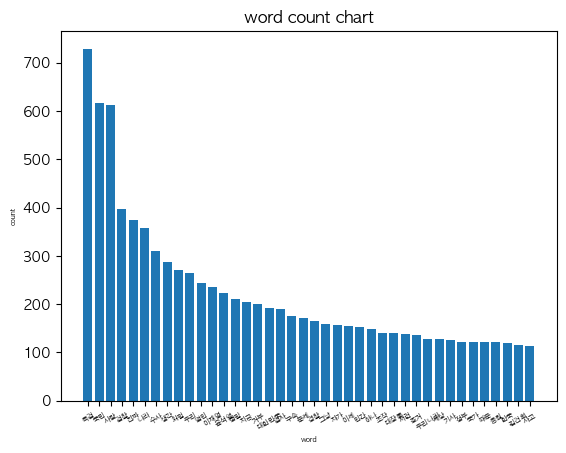

{'특검': 729, '국민': 616, '사람': 613, '검찰': 396, '진짜': 374, '나라': 357, '수사': 310, '생각': 288, '처벌': 270, '우리': 265, '범인': 244, '이재명': 236, '윤석열': 223, '정말': 211, '지금': 205, '거부': 201, '대한민국': 191, '검사': 190, '구속': 176, '문제': 172, '경찰': 164, '그냥': 159, '자가': 156, '이제': 155, '인간': 152, '하나': 149, '조작': 141, '대장동': 140, '저런': 138, '증거': 136, '우리나라': 128, '세상': 127, '기사': 126, '정부': 122, '국가': 121, '때문': 121, '응원': 121, '한국': 120, '김건희': 116, '사고': 114}


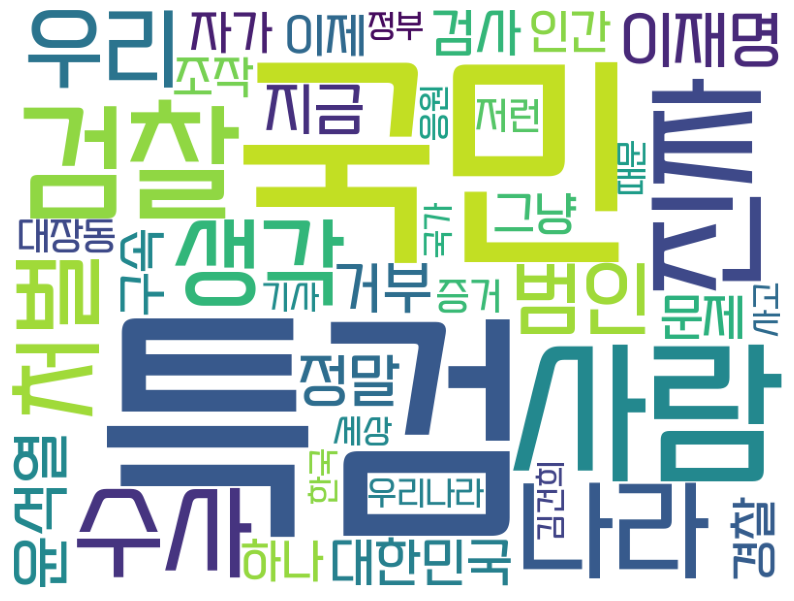

In [142]:
import numpy as np
import matplotlib.pylab as plt
from wordcloud import WordCloud
from collections import Counter


noun_list = []
for i in range(len(last_data)):
    for j in range(len(last_data[0].iloc[i])):
        noun_list.append(last_data[0].iloc[i][j])

counts = Counter(noun_list)
tags = counts.most_common(40)

#bar chart
test = pd.DataFrame({'word': [],
                    'count': []})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]

    insert_data = pd.DataFrame({'word': [word],
                                'count': [count]})
    test = test.append(insert_data)

test.index = range(len(test))

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

index = np.arange(len(test))
plt.bar(index, test['count'].tolist())
plt.xlabel('word', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.xticks(index, test['word'].tolist(), fontsize=5, rotation=30)
plt.title('word count chart')
plt.show()

wc = WordCloud(font_path='/Users/park/Desktop/Assignment/IT집중교육/project/SEBANG Gothic.ttf',
               background_color='white', width=800, height=600)
print(dict(tags))
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()


/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_22245/2701544711.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_22245/2701544711.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_22245/2701544711.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)
/var/folders/pt/07q4_g8x31x06mp93bfxbybw0000gn/T/ipykernel_22245/2701544711.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(insert_data)


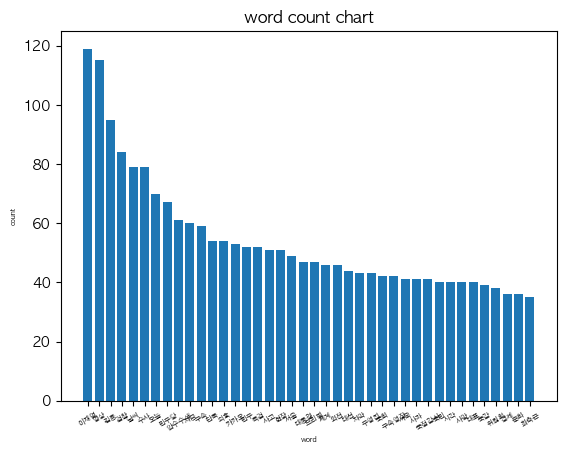

{'이재명': 119, '영상': 115, '김용': 95, '검찰': 84, '날씨': 79, '수사': 79, '오늘': 70, '민주당': 67, '압수수색': 61, '자금': 60, '구속': 59, '단독': 54, '의혹': 54, '카카오': 53, '민주': 52, '특검': 52, '사고': 51, '현장': 51, '서울': 49, '대통령': 47, '브리핑': 47, '세계': 46, '외전': 46, '대선': 44, '자막': 43, '주영진': 43, '국회': 42, '구속영장': 42, '서욱': 41, '사과': 41, '국정감사': 41, '국민': 40, '시각': 40, '사망': 40, '대표': 40, '국감': 39, '위원회': 38, '경제': 36, '문화': 36, '최측근': 35}


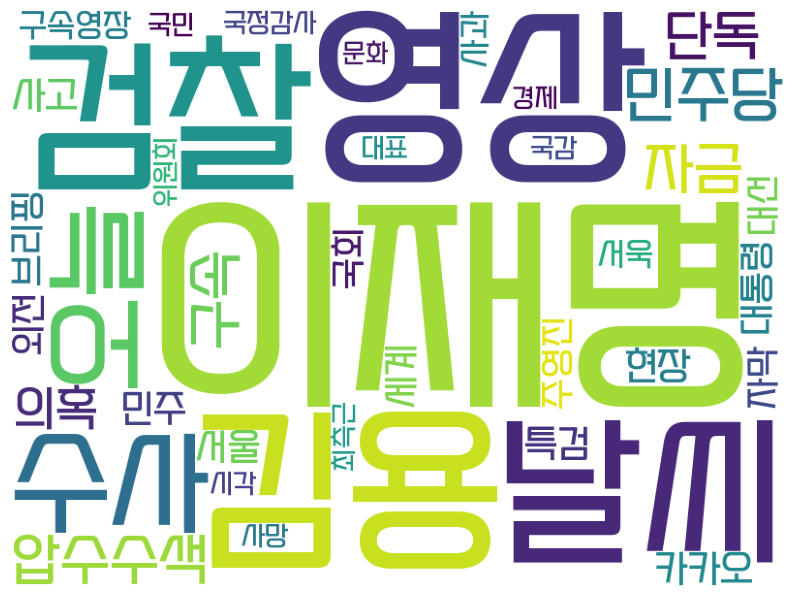

In [143]:
import numpy as np
import matplotlib.pylab as plt
from wordcloud import WordCloud
from collections import Counter


noun_list_t = []
for i in range(len(last_title_data)):
    for j in range(len(last_title_data[0].iloc[i])):
        noun_list_t.append(last_title_data[0].iloc[i][j])

counts_t = Counter(noun_list_t)
tags_t = counts_t.most_common(40)

#bar chart
test = pd.DataFrame({'word': [],
                    'count': []})
for i in range(len(tags_t)):
    word = tags_t[i][0]
    count = tags_t[i][1]

    insert_data = pd.DataFrame({'word': [word],
                                'count': [count]})
    test = test.append(insert_data)

test.index = range(len(test))

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

index = np.arange(len(test))
plt.bar(index, test['count'].tolist())
plt.xlabel('word', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.xticks(index, test['word'].tolist(), fontsize=5, rotation=30)
plt.title('word count chart')
plt.show()

wc = WordCloud(font_path='/Users/park/Desktop/Assignment/IT집중교육/project/SEBANG Gothic.ttf',
               background_color='white', width=800, height=600)
print(dict(tags_t))
cloud = wc.generate_from_frequencies(dict(tags_t))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()


In [16]:
vec = []
for i in range(len(new_data[0])):
    vec2 = []
    tm_ls = new_data[0].iloc[i]
    if len(tm_ls) == 0:  # 비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)):  # 비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)

vec_title = []
for i in range(len(new_title_data[0])):
    vec2 = []
    tm_ls = new_title_data[0].iloc[i]
    if len(tm_ls) == 0:  # 비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)):  # 비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec_title.append(vec2)


In [17]:
print(len(vec))
print(len(vec_title))


7295
1740


In [18]:
# 단어 벡터화
from gensim.models import Word2Vec
model = Word2Vec(sentences=vec, vector_size=100,
								window=7, min_count=3, workers=4, sg=1)
model_title = Word2Vec(sentences=vec_title, vector_size=100, window=3, min_count=3, workers=4, sg=1)

In [19]:
print(last_data.shape)
print(last_title_data.shape)

print(model.wv.vectors.shape)
print(model_title.wv.vectors.shape)

# test_word = '영화'
# try:
# 	result = model.wv.most_similar(test_word, topn=10)
# 	for rst in result:
# 		print(rst)
# except:
# 	print("\'"+ test_word + "\'"+" 는 word2vec에 포함되지 않은 단어 입니다")


(7295, 1)
(1740, 1)
(2856, 100)
(1033, 100)


In [20]:
model.wv.vectors


array([[ 0.122305  ,  0.27691394,  0.4755929 , ..., -0.25077802,
         0.07464284,  0.1237369 ],
       [ 0.13961312,  0.2857221 ,  0.24077637, ..., -0.24141867,
        -0.07616558, -0.02506511],
       [ 0.08272141,  0.24983409, -0.07018491, ..., -0.09977748,
         0.12688681, -0.16814126],
       ...,
       [ 0.04094307,  0.13329816,  0.00728071, ..., -0.0671654 ,
         0.03963913, -0.07154337],
       [ 0.04856407,  0.12556753, -0.00424425, ..., -0.06577381,
         0.03191397, -0.07345659],
       [ 0.01017009,  0.03349017,  0.00562619, ..., -0.02533458,
         0.00641581, -0.03168345]], dtype=float32)

In [21]:
model_title.wv.key_to_index


{'이재명': 0,
 '영상': 1,
 '김용': 2,
 '검찰': 3,
 '수사': 4,
 '날씨': 5,
 '뉴스': 6,
 '오늘': 7,
 '민주당': 8,
 '압수수색': 9,
 '자금': 10,
 '구속': 11,
 '의혹': 12,
 '단독': 13,
 '카카오': 14,
 '특검': 15,
 '민주': 16,
 '현장': 17,
 '사고': 18,
 '서울': 19,
 '대통령': 20,
 '브리핑': 21,
 '외전': 22,
 '세계': 23,
 '대선': 24,
 '자막': 25,
 '주영진': 26,
 '국회': 27,
 '구속영장': 28,
 '국정감사': 29,
 '서욱': 30,
 '사과': 31,
 '사망': 32,
 '국민': 33,
 '시각': 34,
 '대표': 35,
 '국감': 36,
 '위원회': 37,
 '문화': 38,
 '경제': 39,
 '불법': 40,
 '최측근': 41,
 '체포': 42,
 '김홍희': 43,
 '유동': 44,
 '조사': 45,
 '연예': 46,
 '서해': 47,
 '청구': 48,
 '프리': 49,
 '내일': 50,
 '데스크': 51,
 '북한': 52,
 '혐의': 53,
 '한국': 54,
 '와글와글': 55,
 '야당': 56,
 '중계방송': 57,
 '공장': 58,
 '피격': 59,
 '미국': 60,
 '당사': 61,
 '시진핑': 62,
 '대국민': 63,
 '금리': 64,
 '중국': 65,
 '대장동': 66,
 '탄압': 67,
 '장관': 68,
 '글로벌': 69,
 '우려': 70,
 '경찰': 71,
 '최고': 72,
 '시간': 73,
 '정부': 74,
 '안성': 75,
 '긴급': 76,
 '영국': 77,
 '추락': 78,
 '플러스': 79,
 '아파트': 80,
 '수용': 81,
 '이유': 82,
 '총리': 83,
 '논란': 84,
 '제안': 85,
 '수수': 86,
 '사격': 87,
 '합의': 88,
 '확진'

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca_data = pca.fit_transform(model.wv.vectors)
pcaDF = pd.DataFrame(data=pca_data,
										index=model.wv.key_to_index)
# print(pcaDF)

pca_t = PCA(n_components=100)
pca_data_t = pca_t.fit_transform(model_title.wv.vectors)
pcaDF_t = pd.DataFrame(data=pca_data_t, index=model_title.wv.key_to_index)



In [55]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)': pca.explained_variance_, '기여율': pca.explained_variance_ratio_})
result['누적기여율'] = result['기여율'].cumsum()
# pd.set_option('display.max_rows', None)
result


,설명가능한 분산 비율(고윳값),기여율,누적기여율
0,0.077862,0.628088,0.628088
1,0.031548,0.254491,0.882579
2,0.003556,0.028689,0.911268
3,0.002006,0.016183,0.927450
4,0.001777,0.014331,0.941781
5,0.000906,0.007305,0.949086
6,0.000492,0.003971,0.953057
7,0.000426,0.003438,0.956495
8,0.000314,0.002536,0.959031
9,0.000248,0.001998,0.961029


In [24]:
result = pd.DataFrame(
    {'설명가능한 분산 비율(고윳값)': pca_t.explained_variance_, '기여율': pca_t.explained_variance_ratio_})
result['누적기여율'] = result['기여율'].cumsum()
pd.set_option('display.max_rows', None)
result


,설명가능한 분산 비율(고윳값),기여율,누적기여율
0,0.009277,0.721195,0.721195
1,0.000077,0.005984,0.727179
2,0.000061,0.004766,0.731945
3,0.000061,0.004711,0.736656
4,0.000059,0.004561,0.741218
5,0.000057,0.004409,0.745626
6,0.000056,0.004381,0.750007
7,0.000055,0.004300,0.754307
8,0.000055,0.004238,0.758545
9,0.000054,0.004216,0.762761


In [56]:
pca = PCA(n_components=8)
pca_data = pca.fit_transform(model.wv.vectors)
pcaDF = pd.DataFrame(data=pca_data, index=model.wv.key_to_index)
# print(pca.explained_variance_ratio_)

pca_t = PCA(n_components=71)
pca_data_t = pca_t.fit_transform(model_title.wv.vectors)
pcaDF_t = pd.DataFrame(data=pca_data_t, index=model_title.wv.key_to_index)


In [127]:
# SVD
from numpy import linalg
U, s, Vt = np.linalg.svd(model.wv.vectors, full_matrices=True)
s_symmetric = np.zeros(model.wv.vectors.shape)
for i in range(len(s)):
    s_symmetric[i][i] = s[i]

U_t, s_t, Vt_t = np.linalg.svd(model_title.wv.vectors, full_matrices=True)
s_t_symmetric = np.zeros(model_title.wv.vectors.shape)
for i in range(len(s_t)):
    s_t_symmetric[i][i] = s_t[i]

print(s)
print(s_t)


[63.031242    9.523563    3.1921341   2.3932755   2.252417    1.6092507
  1.1856569   1.103059    0.94740427  0.8415063   0.81824136  0.7442158
  0.6798741   0.652887    0.6172813   0.5622685   0.5501222   0.51025134
  0.49755484  0.4805156   0.46701977  0.46429333  0.46313444  0.4468286
  0.44130832  0.4386897   0.42948937  0.4236489   0.41891822  0.4144512
  0.41218448  0.40389517  0.39933845  0.39468518  0.39367932  0.38888022
  0.38645896  0.38440228  0.38080674  0.37665522  0.37573838  0.3756459
  0.37207896  0.36934063  0.36831892  0.3647467   0.36266425  0.36118048
  0.36023483  0.3596702   0.35829982  0.35532475  0.35268834  0.3511794
  0.34990925  0.34782735  0.34726778  0.34641007  0.34298292  0.34284806
  0.33927783  0.33846393  0.33619502  0.33566406  0.33387858  0.33274272
  0.33101943  0.3292679   0.32759175  0.32689828  0.32502282  0.32400462
  0.32332358  0.32286456  0.32080355  0.3195264   0.31687593  0.3164416
  0.31430852  0.31293172  0.31190786  0.31112924  0.309029

In [132]:
print(U[8])
while U.shape[1] != 8:
	U = np.delete(U, 8, axis=1)
print(U.shape)
print(U[8])

print(Vt.shape)
while Vt.shape[0] != 8:
	Vt = np.delete(Vt, 8, axis=0)
print(Vt.shape)

while s_symmetric.shape[1] != 8:
	s_symmetric = np.delete(s_symmetric, 8, axis=1)
while s_symmetric.shape[0] != 8:
	s_symmetric = np.delete(s_symmetric, 8, axis=0)



matA = np.dot(U, np.dot(s_symmetric, Vt))


[-0.02268062 -0.02025496  0.03909714 ... -0.01614699  0.00846175
  0.00449547]
(2856, 8)
[-0.02268062 -0.02025496  0.03909714 -0.01031466 -0.04866365 -0.10872144
  0.10400758 -0.01009496]
(100, 100)
(8, 100)


In [133]:
print(U_t[38])
while U_t.shape[1] != 38:
	U_t = np.delete(U_t, 38, axis=1)
print(U_t.shape)
print(U_t[38])

print(Vt_t.shape)
while Vt_t.shape[0] != 38:
	Vt_t = np.delete(Vt_t, 38, axis=0)
print(Vt_t.shape)

while s_t_symmetric.shape[1] != 38:
	s_t_symmetric = np.delete(s_t_symmetric, 38, axis=1)
while s_t_symmetric.shape[0] != 38:
	s_t_symmetric = np.delete(s_t_symmetric, 38, axis=0)


matB = np.dot(U_t, np.dot(s_t_symmetric, Vt_t))


[-0.05110952  0.04530605  0.06693425  0.10996471  0.01345132  0.05322686
 -0.05102383  0.02695857  0.0162543  -0.03400785  0.00364915 -0.05926843
 -0.00444079  0.01503931  0.04820198 -0.03263655 -0.04618319  0.0717145
  0.0492771  -0.00311594 -0.02168154  0.01552963  0.01312988 -0.00153316
 -0.00683852 -0.00765011  0.0277157   0.08178312  0.04548196  0.04061882
 -0.04193554  0.00954999 -0.01922208 -0.01056652  0.00852453  0.02220027
  0.07799542 -0.01399448]
(1033, 38)
[-0.05110952  0.04530605  0.06693425  0.10996471  0.01345132  0.05322686
 -0.05102383  0.02695857  0.0162543  -0.03400785  0.00364915 -0.05926843
 -0.00444079  0.01503931  0.04820198 -0.03263655 -0.04618319  0.0717145
  0.0492771  -0.00311594 -0.02168154  0.01552963  0.01312988 -0.00153316
 -0.00683852 -0.00765011  0.0277157   0.08178312  0.04548196  0.04061882
 -0.04193554  0.00954999 -0.01922208 -0.01056652  0.00852453  0.02220027
  0.07799542 -0.01399448]
(38, 100)
(38, 100)


In [130]:
print(matA.shape)

(2856, 100)


In [75]:
# # SVD
# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(2)
# s = svd.fit_transform(model.wv.vectors)

# print(s)

# # s_symmetric = np.zeros(model.wv.vectors.shape)
# # for i in range(len(s)):
# #     s_symmetric[i][i] = s[i]

# # print(s_symmetric)
# # print(len(s))

# # U_t, s_t, Vt_t = np.linalg.svd(model_title.wv.vectors, full_matrices=True)

# # print(s_t)

# # s_t_symmetric = np.zeros(model_title.wv.vectors.shape)
# # for i in range(len(s_t)):
# #     s_t_symmetric[i][i] = s_t[i]


[[ 1.9080194   2.2493882 ]
 [ 1.4621627   1.0971078 ]
 [ 1.4318013  -0.20121768]
 ...
 [ 0.7954748  -0.00552067]
 [ 0.7994672  -0.01307582]
 [ 0.2480749  -0.02990511]]


In [134]:
print('origin matrix =', model.wv.vectors.shape)
print('------------------')
print('U matrix =', U.shape)
print('------------------')
print('s matrix =', s.shape)
print('------------------')
print('s_symmetric matrix =', s_symmetric.shape)
print('------------------')
print('Vt matrix =', Vt.shape)
print('------------------')
matA = np.dot(U, np.dot(s_symmetric, Vt))
print(model.wv.vectors - matA)
print('------------------')
print(s_symmetric)
# print('------------------')
# print(model.wv.key_to_index)


origin matrix = (2856, 100)
------------------
U matrix = (2856, 8)
------------------
s matrix = (100,)
------------------
s_symmetric matrix = (8, 8)
------------------
Vt matrix = (8, 100)
------------------
[[-0.00033107 -0.00208204  0.00248616 ... -0.00917996  0.00265423
   0.00730382]
 [-0.02770504  0.01050977  0.01676553 ... -0.0038346  -0.01836923
   0.00503142]
 [-0.01566425  0.00166586 -0.00387237 ...  0.00436629  0.0175576
  -0.01914008]
 ...
 [-0.00400973  0.00199312  0.00467514 ... -0.00255643  0.00412912
   0.00308549]
 [ 0.00489679 -0.00654044 -0.00460092 ... -0.00239713 -0.00388066
   0.00458248]
 [-0.00357222 -0.00860629  0.00884936 ... -0.00437939 -0.00245374
  -0.00298505]]
------------------
[[63.03124237  0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          9.52356339  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          3.19213414  0.          0.          0.
   0.          0.        ]


In [135]:
print('origin matrix =', model_title.wv.vectors.shape)
print('------------------')
print('U matrix =', U_t.shape)
print('------------------')
print('s matrix =', s_t.shape)
print('------------------')
print('s_symmetric matrix =', s_t_symmetric.shape)
print('------------------')
print('Vt matrix =', Vt_t.shape)
print('------------------')
matB = np.dot(U_t, np.dot(s_t_symmetric, Vt_t))
print(model_title.wv.vectors - matB)
print('------------------')
print(s_t_symmetric)
# print('------------------')
# print(model_title.wv.key_to_index)


origin matrix = (1033, 100)
------------------
U matrix = (1033, 38)
------------------
s matrix = (100,)
------------------
s_symmetric matrix = (38, 38)
------------------
Vt matrix = (38, 100)
------------------
[[ 3.15168073e-03 -8.66711026e-04  1.67799514e-03 ... -3.64344722e-05
  -2.13829192e-05  2.93948041e-03]
 [-3.10616280e-03 -4.10165551e-03  3.32989479e-03 ...  1.03329152e-03
   4.46524882e-04  1.16808047e-03]
 [ 1.60932934e-03  1.74473811e-03 -7.33466088e-03 ...  8.02347770e-03
   1.08845005e-03 -7.36629430e-03]
 ...
 [ 4.88118092e-03 -4.76278396e-03  8.21380695e-03 ... -4.14875215e-03
  -2.06516243e-03  5.96136951e-04]
 [-1.06990611e-03 -7.00201065e-03 -1.01226544e-03 ... -2.62900375e-03
  -7.83854122e-04  1.01427768e-03]
 [ 6.65940550e-04  4.96093387e-05 -5.37369097e-03 ...  2.65944902e-03
   6.87599364e-04 -4.16682460e-03]]
------------------
[[4.62295866 0.         0.         ... 0.         0.         0.        ]
 [0.         0.28309759 0.         ... 0.         0.     

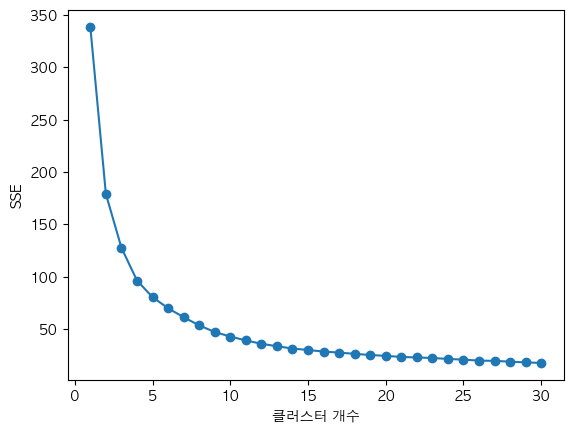

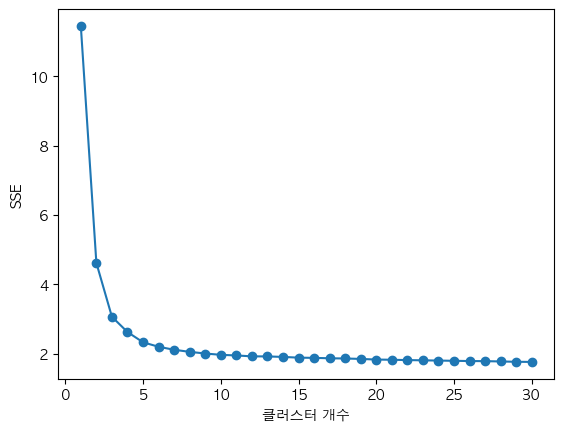

In [129]:
from sklearn.cluster import KMeans
max_cluster_num = 30
def find_elbow(X):
	sse = []
	for n in range(1, max_cluster_num + 1):
		km = KMeans(n_clusters=n, init='k-means++')
		km.fit(X)
		sse.append(km.inertia_)
	plt.plot(range(1, max_cluster_num + 1), sse, marker='o')
	plt.xlabel('클러스터 개수')
	plt.ylabel('SSE')
	plt.show()


find_elbow(matA)
# find_elbow(model.wv.vectors)
find_elbow(matB)
# find_elbow(model_title.wv.vectors)


In [136]:
from sklearn.cluster import KMeans

kmeans_clustering = KMeans(n_clusters=10, init='k-means++')
idx = kmeans_clustering.fit_predict(matA)

kmeans_clustering_title = KMeans(
    n_clusters=5, init='k-means++')
idx_t = kmeans_clustering.fit_predict(matB)


In [137]:
idx = list(idx)
names = model.wv.index_to_key
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}
# print(word_centroid_map)

idx_t = list(idx_t)
names = model_title.wv.index_to_key
word_centroid_map_t = {names[i]: idx_t[i] for i in range(len(names))}
# # print(word_centroid_map)


In [138]:
cluster_data = []
for cluster in range(10):
		print("\nCluster {}".format(cluster))
		words = []
		for i in range(0, len(list(word_centroid_map.values()))):
				if (list(word_centroid_map.values())[i] == cluster):
						words.append(list(word_centroid_map.keys())[i])
		cluster_data.append(words)
		print(words)

cluster_data_t = []
for cluster in range(5):
	print("\nCluster {}".format(cluster))
	words = []
	for i in range(0, len(list(word_centroid_map_t.values()))):
		if (list(word_centroid_map_t.values())[i] == cluster):
			words.append(list(word_centroid_map_t.keys())[i])
	cluster_data_t.append(words)
	print(words)



Cluster 0
['김종대', '지은', '과학', '독재정', '무기징역', '명신', '애국자', '조심', '지옥', '전과', '애가', '로남불', '회의', '표정', '판이', '위원장', '압류', '판검사', '찬양', '유치원', '감사원장', '잡지', '학폭', '최측근', '냄새', '핑핑', '재미', '집안', '마구', '부탁', '민폐', '압색', '달인', '안전교육', '김영호', '망나니', '서욱', '불구속', '일수', '웃음', '만들기', '추산', '원화도', '의자', '아나운서', '현수막', '채림', '불의', '성장', '가식', '주사파', '테크', '구호', '지리', '이보', '동의', '양산', '출근', '학자', '명언', '민간인', '염치', '통제', '하야', '주머니', '단풍', '환경오염', '수온', '혁명', '전태일', '추천', '조상', '미터', '청춘', '대면', '사죄', '나불', '헛소리', '경의', '윤석', '남편', '구만', '어거지', '부메랑', '연금', '편법', '달리', '시리즈', '어케', '절단', '영국인', '선감', '감히', '교육부', '웅장', '지식', '모이', '진급', '집행', '공기', '저쪽', '부활', '대사', '간첩', '가담', '대전', '부끄러움', '가까이', '처분', '국산', '글쎄', '대폭', '치명', '실전', '완화', '베스킨라빈스', '동지', '전환', '참나', '아작', '게이트', '수록', '소장', '크리스마스', '학과', '아웃', '스트레스', '리먼', '탐욕', '손자', '술처', '탈출', '공주', '안민석', '후회', '여기저기', '침낭', '격리', '절벽', '학대', '표시', '세월', '인도', '불신', '일본인', '괴물', '차고', '중계기', '조롱', '재범', '오라', '낫다', '청소', '강요', '일어나지', '각심'

In [156]:
for i in range(10):
	word_arr = []
	t = 0
	for word in cluster_data[i]:
		t += 1
		word_arr.append(word)
		if t == 10:
			break
	print("Cluster", i, "=>", word_arr)

print('\n')

for i in range(5):
	word_arr = []
	t = 0
	for word in cluster_data_t[i]:
		t += 1
		word_arr.append(word)
		if t == 10:
			break
	print("Cluster", i, "=>", word_arr)


Cluster 0 => ['사람', '생각', '처벌', '정말', '문제', '경찰', '그냥', '저런', '우리나라', '세상']
Cluster 1 => ['가맹', '점주', '본사']
Cluster 2 => ['검찰', '나라', '지금', '대한민국', '검사', '구속', '조작', '증거', '응원', '모두']
Cluster 3 => ['고스톱', '수갑', '요안나', '재능', '지진', '미세먼지', '윤성렬', '이형', '심해', '물증']
Cluster 4 => ['혼란', '노고', '아무나', '엠비씨', '김순호', '중단', '코시', '좌우', '리가', '소름']
Cluster 5 => ['특검', '범인', '거부', '자가', '대장동']
Cluster 6 => ['국민', '수사', '이재명', '윤석열', '김건희', '민주당', '대통령', '국힘', '대선', '대표']
Cluster 7 => ['날씨', '용산', '바이든', '공작', '가을', '정은', '강등', '상품', '해체', '캠핑']
Cluster 8 => ['진짜', '우리', '이제', '인간', '하나', '정부', '얼마나', '집회', '이상', '다시']
Cluster 9 => ['김종대', '지은', '과학', '독재정', '무기징역', '명신', '애국자', '조심', '지옥', '전과']


Cluster 0 => ['문화', '데스크', '글로벌', '위반', '부산', '제빵', '결정', '신규', '노영민', '정치']
Cluster 1 => ['광장', '가을', '처리', '원도', '열사', '버스', '병원', '불발', '언제', '사망자']
Cluster 2 => ['검찰', '뉴스', '민주', '브리핑', '외전', '세계', '자막', '시각', '경제', '불법']
Cluster 3 => ['보기', '신고', '거짓', '확대', '해양', '동전', '대우조선', '기계', '정지', '절반']
Cl

In [34]:
# def find_meaningful_data(A, B):
# 	real_last_data = []
# 	for data in A:
# 		for data2 in B:
# 			if data2[0] == data:
# 				real_last_data.append(data)
# 	real_last_data_2 = []
# 	for data in A:
# 		flag_t = 1
# 		for data2 in B:
# 			if data2[0] == data:
# 				flag_t = 0
# 				break
# 		if flag_t == 1:
# 			real_last_data_2.append(data)
# 	real_last_data_3 = []
# 	for data in B:
# 		flag_t = 1
# 		for data2 in A:
# 			if data2 == data[0]:
# 				flag_t = 0
# 				break
# 		if flag_t == 1:
# 			real_last_data_3.append(data)
# 	print("빈도수가 높은 단어 : ", B)
# 	print("\nSVD 의미 있는 단어 : ", A)
# 	print("\n빈도수가 높은 단어 and SVD 의미 있는 단어 : ", real_last_data)
# 	print("\nSVD 의미 있는 단어 - 빈도수가 높은 단어(의미 있는 단어 but, 빈도수는 낮음) : ", real_last_data_2)
# 	print("\n빈도수가 높은 단어 - SVD 의미 있는 단어(빈도수는 높으나 의미 있는 단어가 아님) : ", real_last_data_3)

# find_meaningful_data(meaningful_data, tags)
# print("\n")
# find_meaningful_data(meaningful_data_title, tags_t)

빈도수가 높은 단어 :  [('특검', 729), ('국민', 616), ('사람', 613), ('검찰', 396), ('진짜', 374), ('나라', 357), ('수사', 310), ('생각', 288), ('처벌', 270), ('우리', 265), ('범인', 244), ('이재명', 236), ('윤석열', 223), ('정말', 211), ('지금', 205), ('거부', 201), ('대한민국', 191), ('검사', 190), ('구속', 176), ('문제', 172), ('경찰', 164), ('그냥', 159), ('자가', 156), ('이제', 155), ('인간', 152), ('하나', 149), ('조작', 141), ('대장동', 140), ('저런', 138), ('증거', 136), ('우리나라', 128), ('세상', 127), ('기사', 126), ('정부', 122), ('국가', 121), ('때문', 121), ('응원', 121), ('한국', 120), ('김건희', 116), ('사고', 114)]

SVD 의미 있는 단어 :  ['진짜', '우리', '이제', '인간', '하나', '정부', '얼마나', '집회', '이상', '다시', '언론', '제발', '무슨', '자기', '북한', '제대로', '자신', '가족', '걱정', '모든', '국민', '수사', '이재명', '윤석열', '김건희', '민주당', '대통령', '국힘', '대선', '대표', '사람', '생각', '처벌', '정말', '문제', '경찰', '그냥', '저런', '우리나라', '세상', '기사', '국가', '때문', '한국', '사고', '영국', '정도', '일본', '기업', '드론', '노동자', '상황', '사과', '계속', '미국', '명복', '중국', '일이', '이번', '안전', '보고', '아이', '마음', '간호사', '다른', '공무원', '특검', '범인', '거부', '자가', '대장동', 

빈도수가 높은 단어 :  [('특검', 729), ('국민', 616), ('사람', 613), ('검찰', 396), ('진짜', 374), ('나라', 357), ('수사', 310), ('생각', 288), ('처벌', 270), ('우리', 265), ('범인', 244), ('이재명', 236), ('윤석열', 223), ('정말', 211), ('지금', 205), ('거부', 201), ('대한민국', 191), ('검사', 190), ('구속', 176), ('문제', 172), ('경찰', 164), ('그냥', 159), ('자가', 156), ('이제', 155), ('인간', 152), ('하나', 149), ('조작', 141), ('대장동', 140), ('저런', 138), ('증거', 136), ('우리나라', 128), ('세상', 127), ('기사', 126), ('정부', 122), ('국가', 121), ('때문', 121), ('응원', 121), ('한국', 120), ('김건희', 116), ('사고', 114)]

SVD 의미 있는 단어 :  ['검찰', '대한민국', '검사', '구속', '조작', '증거', '응원', '모두', '판사', '유동', '정치', '누가', '정권', '사건', '위해', '시간', '진술', '누구', '반드시', '범죄', '회유', '사실', '진실', '국민', '수사', '이재명', '윤석열', '김건희', '민주당', '대통령', '국힘', '대선', '대표', '사람', '생각', '처벌', '정말', '문제', '경찰', '그냥', '저런', '우리나라', '세상', '기사', '국가', '때문', '한국', '사고', '얼마나', '영국', '정도', '일본', '기업', '드론', '노동자', '상황', '계속', '미국', '명복', '중국', '일이', '이번', '안전', '보고', '북한', '아이', '자신', '마음', '간호사', '다른', '공무원', '특검', '범인', '거부', '자가', '대장동', '진짜', '나라', '우리', '지금', '이제', '인간', '하나', '정부', '집회', '이상', '다시', '사과', '언론', '제발', '무슨', '언제', '자기', '시작', '제대로', '가족', '걱정', '모든', '가맹', '점주']

빈도수가 높은 단어 and SVD 의미 있는 단어 :  ['검찰', '대한민국', '검사', '구속', '조작', '증거', '응원', '국민', '수사', '이재명', '윤석열', '김건희', '사람', '생각', '처벌', '정말', '문제', '경찰', '그냥', '저런', '우리나라', '세상', '기사', '국가', '때문', '한국', '사고', '특검', '범인', '거부', '자가', '대장동', '진짜', '나라', '우리', '지금', '이제', '인간', '하나', '정부']

SVD 의미 있는 단어 - 빈도수가 높은 단어(의미 있는 단어 but, 빈도수는 낮음) :  ['모두', '판사', '유동', '정치', '누가', '정권', '사건', '위해', '시간', '진술', '누구', '반드시', '범죄', '회유', '사실', '진실', '민주당', '대통령', '국힘', '대선', '대표', '얼마나', '영국', '정도', '일본', '기업', '드론', '노동자', '상황', '계속', '미국', '명복', '중국', '일이', '이번', '안전', '보고', '북한', '아이', '자신', '마음', '간호사', '다른', '공무원', '집회', '이상', '다시', '사과', '언론', '제발', '무슨', '언제', '자기', '시작', '제대로', '가족', '걱정', '모든', '가맹', '점주']

빈도수가 높은 단어 - SVD 의미 있는 단어(빈도수는 높으나 의미 있는 단어가 아님) :  []


빈도수가 높은 단어 :  [('이재명', 119), ('영상', 115), ('김용', 95), ('검찰', 84), ('날씨', 79), ('수사', 79), ('오늘', 70), ('민주당', 67), ('압수수색', 61), ('자금', 60), ('구속', 59), ('단독', 54), ('의혹', 54), ('카카오', 53), ('민주', 52), ('특검', 52), ('사고', 51), ('현장', 51), ('서울', 49), ('대통령', 47), ('브리핑', 47), ('세계', 46), ('외전', 46), ('대선', 44), ('자막', 43), ('주영진', 43), ('국회', 42), ('구속영장', 42), ('서욱', 41), ('사과', 41), ('국정감사', 41), ('국민', 40), ('시각', 40), ('사망', 40), ('대표', 40), ('국감', 39), ('위원회', 38), ('경제', 36), ('문화', 36), ('최측근', 35)]

SVD 의미 있는 단어 :  ['외전', '문화', '최측근', '데스크', '중계방송', '위반', '제빵', '결정', '미세먼지', '반발', '글로벌', '부산', '뉴스', '민주', '브리핑', '자막', '시각', '불법', '체포', '연예', '청구', '프리', '와글와글', '미국', '대장동', '탄압', '경찰', '영국', '플러스', '아파트', '수용', '논란', '수수', '사격', '합의', '확진', '노동자', '피해']

빈도수가 높은 단어 and SVD 의미 있는 단어 :  ['외전', '문화', '최측근', '민주', '브리핑', '자막', '시각']

SVD 의미 있는 단어 - 빈도수가 높은 단어(의미 있는 단어 but, 빈도수는 낮음) :  ['데스크', '중계방송', '위반', '제빵', '결정', '미세먼지', '반발', '글로벌', '부산', '뉴스', '불법', '체포', '연예', '청구', '프리', '와글와글', '미국', '대장동', '탄압', '경찰', '영국', '플러스', '아파트', '수용', '논란', '수수', '사격', '합의', '확진', '노동자', '피해']

빈도수가 높은 단어 - SVD 의미 있는 단어(빈도수는 높으나 의미 있는 단어가 아님) :  [('이재명', 119), ('영상', 115), ('김용', 95), ('검찰', 84), ('날씨', 79), ('수사', 79), ('오늘', 70), ('민주당', 67), ('압수수색', 61), ('자금', 60), ('구속', 59), ('단독', 54), ('의혹', 54), ('카카오', 53), ('특검', 52), ('사고', 51), ('현장', 51), ('서울', 49), ('대통령', 47), ('세계', 46), ('대선', 44), ('주영진', 43), ('국회', 42), ('구속영장', 42), ('서욱', 41), ('사과', 41), ('국정감사', 41), ('국민', 40), ('사망', 40), ('대표', 40), ('국감', 39), ('위원회', 38), ('경제', 36)]